In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

### Phase 1: 🕸️Data Scraping 
1.	Identify Categories

	*Select product categories to scrape (e.g., electronics, fashion, home appliances).*
	
     I will scrape data from the following categories:

	* Phones & accessories
	* TV's & Audio
	* Computing / Computer Accessories
	
	*Compare how categories are structured on Jumia vs. Kilimall.*

_Jumia Kenya_

Main Categories chosen:

* Phones & Tablets
* TVs & Audio
* Computing

Sub Categories under Phones & Tablets

* Mobile Phone Accessories
* Mobile Phones
* Phone & Fax
* Tablet Accessories
* Tablet Replacement Parts
* Tablets
* Landline Phones & Accessories

_Kilimall_

Main Categories chosen:

* Phones & Accessories
* TV, Audio & Video
* Computers & Accessories

Sub categories under Phones & Acccessories

* Smart Phones
* Featured Phones
* Refurbished Phones
* Wired Earphones
* Bluetooth Earphones
* Headphones
* Sports Earphones
* Smartwatches
* Smartwatch Accessories
* Body Mounted Cameras
* Arm & Wristband Accessories etc.


### 	2.	Scrape Product Listings
• Extract product details: Name, Price, Brand, Ratings, Reviews, Discount, and Seller Information.

• Collect at least 500-1000 products from each platform.

In [2]:
#I will use the Phone and Accessories Category
kilimall_url = "https://www.kilimall.co.ke/category/phones-accessories?id=872&form=category"
jumia_url = "https://www.jumia.co.ke/phones-tablets/"

In [3]:
kilimall_response = requests.get(kilimall_url)
kilimall_response

<Response [200]>

In [4]:
jumia_response = requests.get(jumia_url)
jumia_response

<Response [200]>

In [5]:
kilimall_sourcecode = BeautifulSoup(kilimall_response.content, 'html.parser')
jumia_sourcecode = BeautifulSoup(jumia_response.content, 'html.parser')

I will start 🗒️extracting details from kilimall first

In [6]:
#Phone Names

k_phone_names = []
knames = kilimall_sourcecode.find_all(class_="product-title")

for name in knames:
    k_phone_names.append(name.text)
    
k_phone_names

['Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch " 2730 mAh Dual SIM 8MP+5MP Android Smartphones/ Mobile Phones',
 'Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone',
 'XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB Ram 50MP AI Dual Camera Immersive 6.88" UHD Display Upto 120Hz Refresh Rate Dual Sim 5160mAh (typ) Battery Elegant glass back cover  Smart Phone',
 '[New Arrival] Xiaomi Redmi 14C 6.74" 8GB RAM + 256GB Storage 4G Network Dual SIM 90Hz LCD Screen 50MP Camera 33W Type-C Charging 5160mAh Battery Fingerprin t& Face Smart Phones Phone',
 'Brand New original Nokia 105,1.77" Screen,Dual sim, Feature phone',
 'The latest hot selling P9 Pro Max TWS microphone noise cancelling bass subwoofer fashion wireless sports headphones',
 '[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM 6.6" Screen  4G Network Phone Dual SIM 13MP Camera 5000mAh Battery Fingerprint And Face Unlock Fashion Smart Phones',
 '【3 free gifts】Hig

In [7]:
#Phone Prices

k_phone_prices = []
kprices = kilimall_sourcecode.find_all(class_="product-price")

for price in kprices:
    k_phone_prices.append(price.text)

k_phone_prices

['KSh 2,699',
 'KSh 459',
 'KSh 12,290',
 'KSh 15,390',
 'KSh 1,050',
 'KSh 599',
 'KSh 9,199',
 'KSh 479',
 'KSh 1,180',
 'KSh 419',
 'KSh 1,299',
 'KSh 329',
 'KSh 329',
 'KSh 12,599',
 'KSh 1,299',
 'KSh 229',
 'KSh 12,299',
 'KSh 1,149',
 'KSh 499',
 'KSh 379',
 'KSh 6,699',
 'KSh 259',
 'KSh 18,499',
 'KSh 399',
 'KSh 258',
 'KSh 398',
 'KSh 275',
 'KSh 4,199',
 'KSh 759',
 'KSh 359',
 'KSh 359',
 'KSh 1,299',
 'KSh 3,999',
 'KSh 399',
 'KSh 9,880',
 'KSh 1,549']

In [8]:
#Rating

k_phone_rating = []
krating = kilimall_sourcecode.find_all(class_="rate")

for rate in krating:
    k_phone_rating.append(rate.text)

k_phone_rating

['(413)',
 '(4511)',
 '(286)',
 '(13)',
 '(4)',
 '(1352)',
 '(662)',
 '(4673)',
 '(199)',
 '(2174)',
 '(1266)',
 '(935)',
 '(1733)',
 '(138)',
 '(1259)',
 '(613)',
 '(10)',
 '(154)',
 '(2435)',
 '(280)',
 '(141)',
 '(218)',
 '(19)',
 '(150)',
 '(304)',
 '(17319)',
 '(3)',
 '(24)',
 '(120)',
 '(284)',
 '(383)',
 '(751)',
 '(95)',
 '(107)',
 '(225)',
 '(5)']

In [9]:
#Reviews

k_phone_reviews = []
kreviews = kilimall_sourcecode.find_all(class_="info-box")

for review in kreviews:
    k_phone_reviews.append(review.text)

k_phone_reviews


['Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch " 2730 mAh Dual SIM 8MP+5MP Android Smartphones/ Mobile PhonesKSh 2,699(413)Local Dispatch',
 'Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phoneKSh 459(4511)Fulfilled By Kilimall',
 'XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB Ram 50MP AI Dual Camera Immersive 6.88" UHD Display Upto 120Hz Refresh Rate Dual Sim 5160mAh (typ) Battery Elegant glass back cover  Smart PhoneKSh 12,290(286)Local Dispatch',
 '[New Arrival] Xiaomi Redmi 14C 6.74" 8GB RAM + 256GB Storage 4G Network Dual SIM 90Hz LCD Screen 50MP Camera 33W Type-C Charging 5160mAh Battery Fingerprin t& Face Smart Phones PhoneKSh 15,390(13)Local Dispatch',
 'Brand New original Nokia 105,1.77" Screen,Dual sim, Feature phoneKSh 1,050(4)Local Dispatch',
 'The latest hot selling P9 Pro Max TWS microphone noise cancelling bass subwoofer fashion wireless sports headphonesKSh 599(1352)Fulfilled By Kilimall',
 '[CAS

In [10]:
# Seller Information

k_phone_sellerinfo = []
ksellerinfo = kilimall_sourcecode.find_all(class_="tag-bg")

for sellerinfo in ksellerinfo:
    k_phone_sellerinfo.append(review.text)

k_phone_sellerinfo

['(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR OFFER) SAMSUNG SM-B310E  BRAND NEW DUAL SIM, FEATURE PHONE, Classy, Fancy, SM-B310E, 1 Year WarrantyKSh 1,549(5)Local Dispatch',
 '(NEW YEAR O

Exctracting for Jumia

In [11]:
#Phone Names

j_phone_names = []
jnames = jumia_sourcecode.find_all(class_="name")

for names in jnames:
    j_phone_names.append(names.text)
    
print(len(j_phone_names))

103


In [12]:
#Phone Prices

j_phone_prices = []
jprices = jumia_sourcecode.find_all(class_="prc")

for prices in jprices:
    j_phone_prices.append(prices.text)
    
print(len(j_phone_prices))

103


In [13]:
#Discount

j_phone_discount = []
jdiscount = jumia_sourcecode.find_all(class_="bdg _dsct")

for discount in jdiscount:
    j_phone_discount.append(discount.text)

print(len(j_phone_discount))

60


### 3.	Scrape Product Reviews
• Extract customer reviews and ratings for at least 50 popular products.

In [14]:
#Reviews

reviews = []
review = kilimall_sourcecode.find_all(class_="reviews")

for rev in review:
    reviews.append(rev.text)

reviews

['(413)',
 '(4511)',
 '(286)',
 '(13)',
 '(4)',
 '(1352)',
 '(662)',
 '(4673)',
 '(199)',
 '(2174)',
 '(1266)',
 '(935)',
 '(1733)',
 '(138)',
 '(1259)',
 '(613)',
 '(10)',
 '(154)',
 '(2435)',
 '(280)',
 '(141)',
 '(218)',
 '(19)',
 '(150)',
 '(304)',
 '(17319)',
 '(3)',
 '(24)',
 '(120)',
 '(284)',
 '(383)',
 '(751)',
 '(95)',
 '(107)',
 '(225)',
 '(5)']

In [15]:
#Bad Reviews

j_phone_low_rating = []
j_low_rating = kilimall_sourcecode.find_all("i", class_="van-badge__wrapper van-icon van-icon-star van-rate__icon van-rate__icon--full")

for jlow in j_low_rating:
    j_phone_low_rating.append(jlow.text)

print(f"Number of bad reviews: {len(j_phone_low_rating)}")

Number of bad reviews: 142


In [16]:
#Good Reviews

j_phone_high_rating = []
j_high_rating = kilimall_sourcecode.find_all("i", class_="van-badge__wrapper van-icon van-icon-star-o van-rate__icon")

for jhigh in j_high_rating:
    j_phone_high_rating.append(jhigh.text)

print(f"Number of Good reviews: {len(j_phone_high_rating)}")

Number of Good reviews: 38


### Phase 2: 📝Data Cleaning & Storage
4.	Data Cleaning & Formatting
    * Handle missing values and remove duplicates.
    * Normalize price formats (convert to a common currency if needed).
    * Store the data in a structured format (CSV, JSON, or a database).

In [17]:
#Will start with Kilimall
    #k_phone_names
    #k_phone_prices
    #k_phone_rating
    #k_phone_reviews
    #k_phone_sellerinfo

#Put the data into a DataFrame

kilimall_data = pd.DataFrame({
    "Phone Name": k_phone_names,
    "Price": k_phone_prices,
    "Rating": k_phone_rating,
    "Reviews": k_phone_reviews,
    "Seller Information": k_phone_sellerinfo
})

kilimall_data

,Phone Name,Price,Rating,Reviews,Seller Information
0,Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,"KSh 2,699",(413),Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
1,Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,KSh 459,(4511),Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
2,XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,"KSh 12,290",(286),XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
3,"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...","KSh 15,390",(13),"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...",(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
4,"Brand New original Nokia 105,1.77"" Screen,Dual...","KSh 1,050",(4),"Brand New original Nokia 105,1.77"" Screen,Dual...",(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
5,The latest hot selling P9 Pro Max TWS micropho...,KSh 599,(1352),The latest hot selling P9 Pro Max TWS micropho...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
6,[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,"KSh 9,199",(662),[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
7,【3 free gifts】High Speed TF Card Micro SD Card...,KSh 479,(4673),【3 free gifts】High Speed TF Card Micro SD Card...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
8,Refurbished Phones Nokia 105 (2017)- Original ...,"KSh 1,180",(199),Refurbished Phones Nokia 105 (2017)- Original ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
9,4PCS Tripod Stand Ring Light Phones Selfie Sti...,KSh 419,(2174),4PCS Tripod Stand Ring Light Phones Selfie Sti...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...


In [18]:
# Now for Jumia

    #j_phone_names
    #j_phone_prices
    #j_phone_discount


# Convert list to Pandas Series
j_phone_discount = pd.Series(j_phone_discount)

# Fill missing values with 0
j_phone_discount = j_phone_discount.fillna(0)

print(j_phone_discount)


0     34%
1     17%
2     17%
3     47%
4     51%
5     47%
6     23%
7     17%
8     18%
9     30%
10    34%
11    34%
12    34%
13    34%
14    17%
15    17%
16    17%
17    17%
18    17%
19    17%
20    17%
21    17%
22    17%
23    17%
24    20%
25    17%
26    17%
27    17%
28    17%
29    26%
30    17%
31    17%
32    18%
33     7%
34    17%
35    28%
36    31%
37    11%
38    23%
39    37%
40    47%
41    38%
42    37%
43    41%
44    18%
45    17%
46    48%
47    17%
48    17%
49    19%
50    30%
51    17%
52    17%
53    49%
54    47%
55    39%
56    50%
57    48%
58    49%
59    42%
dtype: object


In [19]:
# Convert into list

jumiadata = list(zip(j_phone_names, j_phone_prices, j_phone_discount))
jumiadata

[('Infinix Smart 8 6.6" HD, 2GB RAM + 64GB , Android 13 (Dual sim) 5000mAh - Timber Black',
  'KSh 9,297',
  '34%'),
 ('Poco C75, 6.88", 128GB + 6GB RAM (Dual SIM), 5160mAh, Black (2YRs WRTY)',
  'KSh 14,016',
  '17%'),
 ('Itel A18s 5.0" 32GB + 2GB RAM, 5MP, Android 13, 3020mAh -?Sunrise orange (1YR WRTY)',
  'KSh 5,914',
  '17%'),
 ('Blackview Wave 6C, 6.5", 2GB RAM + 32GB (Dual SIM), 8MP Camera, 5100mAh Battery - 4G, Black.',
  'KSh 12,999',
  '47%'),
 ('Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card',
  'KSh 7,999',
  '51%'),
 ('Samsung  Galaxy A05s, 6.7", 128GB + 4GB RAM (Dual SIM), 5000mAh, Black',
  'KSh 14,690',
  '47%'),
 ('Infinix HOT 50i Display: 6.7 HD RAM: 6GB (Expandable up to 12GB) ROM: 128GB DUAL SIM  SW I12',
  'KSh 13,299',
  '23%'),
 ("Itel Itel1.83'' Sones SmartWatch NativeStorm WaterProof",
  'KSh 1,550',
  '17%'),
 ('Samsung A05, 6.7", 4GB RAM + 64GB, 5000mAh, Black  (1YR WRTY)',
  'KSh 10,430',
  '18%'),
 ('SIMI S102 1.7

In [20]:
# Creating a data frame

jumia_data = pd.DataFrame(jumiadata, columns=["Phone", "Price", "Discount"])

jumia_data

,Phone,Price,Discount
0,"Infinix Smart 8 6.6"" HD, 2GB RAM + 64GB , Andr...","KSh 9,297",34%
1,"Poco C75, 6.88"", 128GB + 6GB RAM (Dual SIM), 5...","KSh 14,016",17%
2,"Itel A18s 5.0"" 32GB + 2GB RAM, 5MP, Android 13...","KSh 5,914",17%
3,"Blackview Wave 6C, 6.5"", 2GB RAM + 32GB (Dual ...","KSh 12,999",47%
4,"Badili Samsung Galaxy A20 White, 32GB/3GB,Sing...","KSh 7,999",51%
5,"Samsung Galaxy A05s, 6.7"", 128GB + 4GB RAM (D...","KSh 14,690",47%
6,Infinix HOT 50i Display: 6.7 HD RAM: 6GB (Expa...,"KSh 13,299",23%
7,Itel Itel1.83'' Sones SmartWatch NativeStorm W...,"KSh 1,550",17%
8,"Samsung A05, 6.7"", 4GB RAM + 64GB, 5000mAh, Bl...","KSh 10,430",18%
9,SIMI S102 1.77inch Feature Phone Dual SIM Card...,"KSh 1,399",30%


In [21]:
kilimall_data

,Phone Name,Price,Rating,Reviews,Seller Information
0,Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,"KSh 2,699",(413),Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
1,Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,KSh 459,(4511),Air Pro3 TWS Macaron Color Pro 3 earpods Earph...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
2,XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,"KSh 12,290",(286),XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB R...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
3,"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...","KSh 15,390",(13),"[New Arrival] Xiaomi Redmi 14C 6.74"" 8GB RAM +...",(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
4,"Brand New original Nokia 105,1.77"" Screen,Dual...","KSh 1,050",(4),"Brand New original Nokia 105,1.77"" Screen,Dual...",(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
5,The latest hot selling P9 Pro Max TWS micropho...,KSh 599,(1352),The latest hot selling P9 Pro Max TWS micropho...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
6,[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,"KSh 9,199",(662),[CASHBACK FRIDAY] Itel A70 128GB+8(3+5)GB RAM ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
7,【3 free gifts】High Speed TF Card Micro SD Card...,KSh 479,(4673),【3 free gifts】High Speed TF Card Micro SD Card...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
8,Refurbished Phones Nokia 105 (2017)- Original ...,"KSh 1,180",(199),Refurbished Phones Nokia 105 (2017)- Original ...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...
9,4PCS Tripod Stand Ring Light Phones Selfie Sti...,KSh 419,(2174),4PCS Tripod Stand Ring Light Phones Selfie Sti...,(NEW YEAR OFFER) SAMSUNG SM-B310E BRAND NEW D...


### Phase 3: 💹Data Analysis
5.	Price Comparison Analysis
	* Compare similar products between Jumia and Kilimall.
	* Identify price differences and trends (e.g., which platform is cheaper for specific categories).
6.	Discount & Promotions Analysis
	* Identify the average discount percentage per category.
	* Compare how often discounts are offered on both platforms.
7.	Seller Analysis
	* Identify top-selling brands and sellers.
	* Compare seller pricing strategies between Jumia and Kilimall.
8.	Customer Review Sentiment Analysis
	* Perform sentiment analysis on reviews using Python’s NLP libraries (NLTK, TextBlob, or Vader).
	* Identify the most common complaints and praises for each platform.
9.	Delivery & Logistics Analysis
	* Check if product delivery details are available (estimated delivery time, shipping cost).
	* Compare delivery options and costs between Jumia and Kilimall.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12304 (\N{LEFT BLACK LENTICULAR BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2

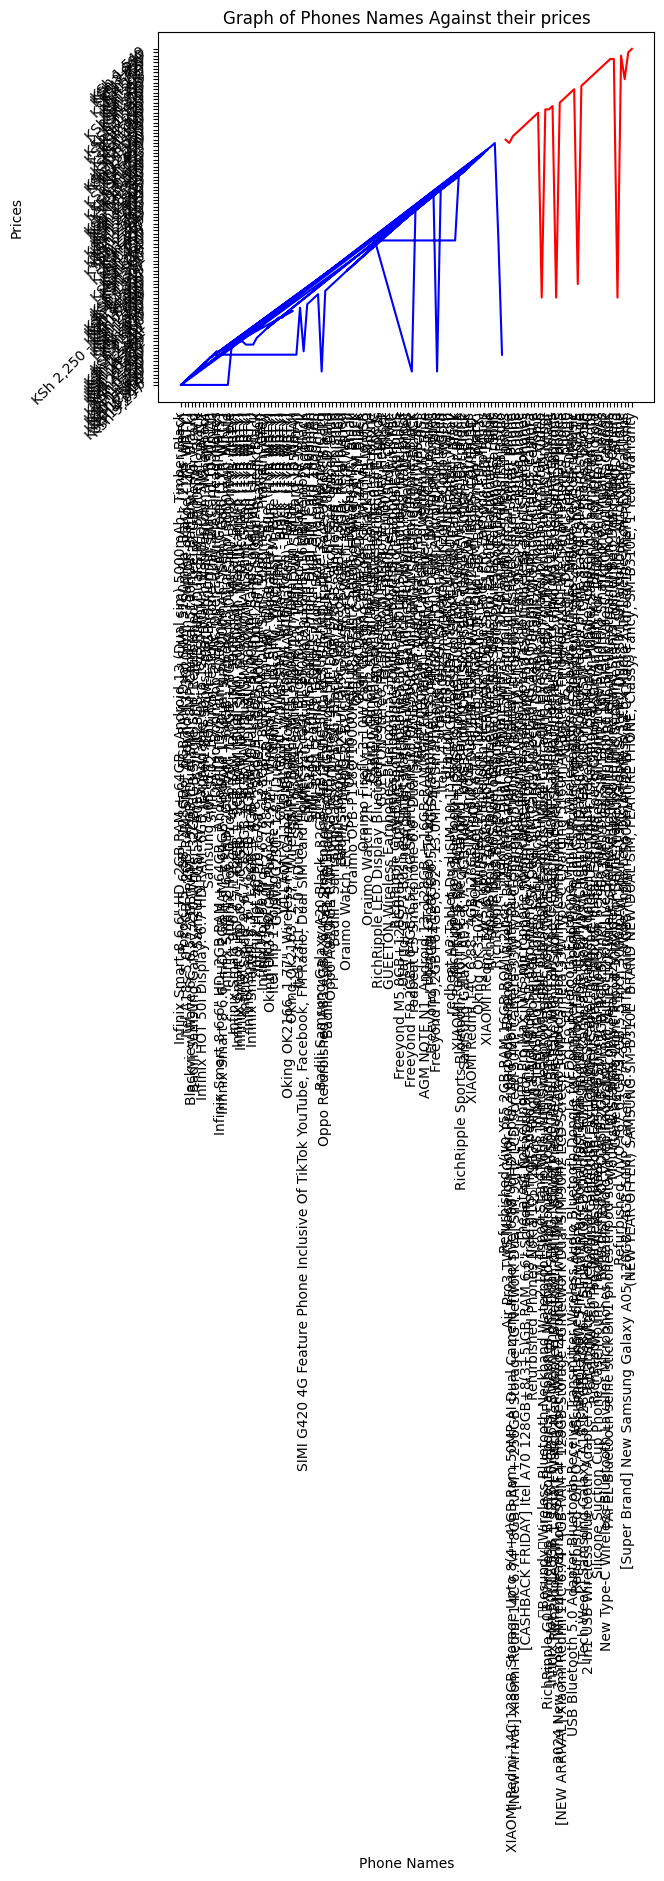

In [22]:
plt.plot(j_phone_names, j_phone_prices, color="blue")
plt.plot(k_phone_names, k_phone_prices, color="red")
#Plotting a graph of phone names against Prices

plt.title("Graph of Phones Names Against their prices")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.xlabel("Phone Names")
plt.ylabel("Prices")

plt.show()

In [23]:
#Average discount per category
v_jumia_data = jumia_data["Phone"].value_counts()
v_jumia_data

Phone
Infinix Smart 8 6.6" HD, 2GB RAM + 64GB , Android 13 (Dual sim) 5000mAh - Timber Black                                                           2
SIMI S102 1.77inch Feature Phone Dual SIM Card 1050mAh                                                                                           2
Poco C75, 6.88", 128GB + 6GB RAM (Dual SIM), 5160mAh, Black (2YRs WRTY)                                                                          1
Itel A18s 5.0" 32GB + 2GB RAM, 5MP, Android 13, 3020mAh -?Sunrise orange (1YR WRTY)                                                              1
Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card                                                       1
Blackview Wave 6C, 6.5", 2GB RAM + 32GB (Dual SIM), 8MP Camera, 5100mAh Battery - 4G, Black.                                                     1
Samsung  Galaxy A05s, 6.7", 128GB + 4GB RAM (Dual SIM), 5000mAh, Black                                          

In [24]:
v_kilimall_data = kilimall_data["Phone Name"].value_counts()
v_kilimall_data

Phone Name
Refurbished Vivo Y55 2GB RAM 16GB ROM 5.2inch " 2730 mAh Dual SIM 8MP+5MP Android Smartphones/ Mobile Phones                                                                                     1
Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone                                                                   1
XIAOMI Redmi 14C 128GB Storage Upto 8(4+4)GB Ram 50MP AI Dual Camera Immersive 6.88" UHD Display Upto 120Hz Refresh Rate Dual Sim 5160mAh (typ) Battery Elegant glass back cover  Smart Phone    1
[New Arrival] Xiaomi Redmi 14C 6.74" 8GB RAM + 256GB Storage 4G Network Dual SIM 90Hz LCD Screen 50MP Camera 33W Type-C Charging 5160mAh Battery Fingerprin t& Face Smart Phones Phone           1
Brand New original Nokia 105,1.77" Screen,Dual sim, Feature phone                                                                                                                                1
The latest hot

In [25]:
# Calculate average discount per category
# ✅ Remove % and convert to float
jumia_data["Discount"] = jumia_data["Discount"].astype(str).str.replace("%", "").astype(float)

avg_discount_per_category = jumia_data.groupby("Phone")["Discount"].mean()
avg_discount_per_category

Phone
Badili - Google Pixel 7, Dual sim, Black, 8GB/128GB, Refurbished                                                                                 48.0
Badili - Samsung A14 5G,Black, 64GB/4GB,Single Sim, Refurbished + Free 128GB SD Card                                                             41.0
Badili - Samsung Galaxy A71 5G ,Black, 6GB/128GB, Single Sim, Refurbished                                                                        17.0
Badili Samsung Galaxy A20 Black, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card                                                       38.0
Badili Samsung Galaxy A20 White, 32GB/3GB,Single Sim, Refurbished + Free 32 GB Memory Card                                                       51.0
Badili Samsung S21 Ultra 5G, Silver, 256GB + 12GB, Refurbished                                                                                   17.0
Blackview Wave 6C, 6.5", 2GB RAM + 32GB (Dual SIM), 8MP Camera, 5100mAh Battery - 4G, Black.  

*Summarize key findings in a detailed report with charts and graphs*

<Axes: xlabel='Phone', ylabel='Price'>

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-

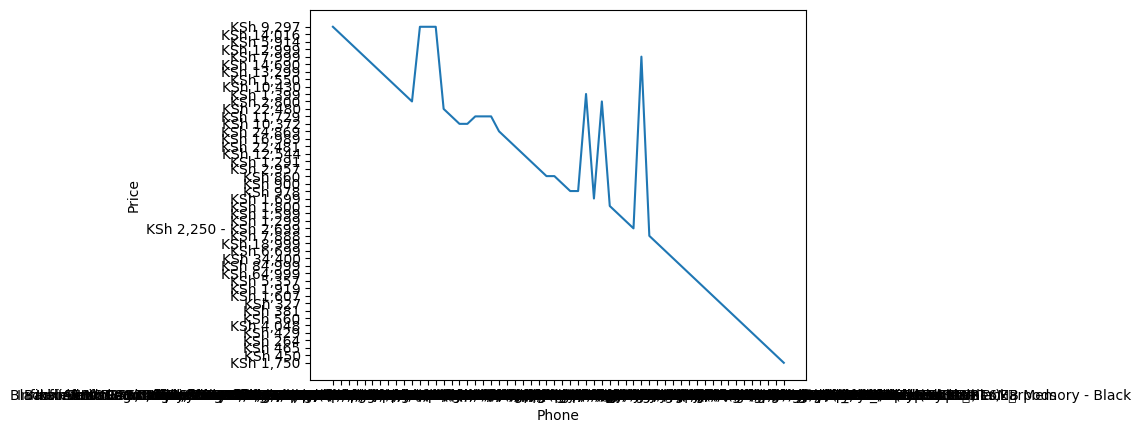

In [26]:
sns.lineplot(x="Phone", y="Price", data=jumia_data)

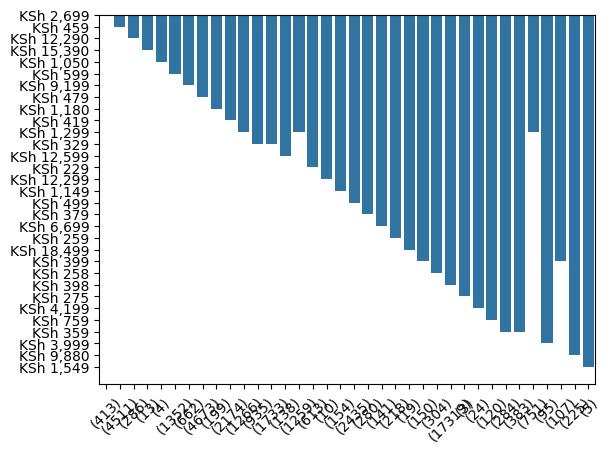

In [27]:
sns.barplot(x=k_phone_rating, y=k_phone_prices, data=kilimall_data)

plt.xticks(rotation=45)

plt.show()

Sentiment Analysis

In [28]:
text = "This food is not sweet"
sentiment = TextBlob(text).sentiment
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

Polarity: -0.175, Subjectivity: 0.65


In [29]:
review_url = "https://www.kilimall.co.ke/listing/2467681-air-pro3-tws-macaron-color-pro-3-earpods-earphone-wireless-bluetooth-earphone-bluetooth-v50-touch-control-for-all-smart-phone?skuId=18058936"

In [30]:
review_response = requests.get(review_url)
review_response

<Response [200]>

<!DOCTYPE html>
<html data-capo=""><head><meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0;" name="viewport"/>
<title>Best price for Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone</title>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=AW-965268020"></script>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-MBL06JR793"></script>
<script async="" src="/js/regions-pwa.min.js"></script>
<script src="/js/globalThis.min.js"></script>
<style>html{font-family:Open Sans,Roboto,Helvetica,sans-serif,Arial;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}html *{outline:0;-webkit-text-size-adjust:none;-webkit-tap-highlight-color:rgba(0,0,0,0)}body,html{font-family:Open Sans,Roboto,Helvetica,sans-serif,Arial;font-size:.38889rem}article,aside,blockquote,body,button,code,dd,details,div,dl,dt,fieldset,figcaption,figure,f
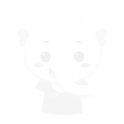
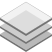

In [31]:
review_sourcecode = BeautifulSoup(review_response.text, "html.parser")
review_sourcecode

<!DOCTYPE html>
<html data-capo="">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0;" name="viewport"/>
  <title>
   Best price for Air Pro3 TWS Macaron Color Pro 3 earpods Earphone Wireless Bluetooth Earphone Bluetooth V5.0 Touch Control for all Smart phone
  </title>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=AW-965268020">
  </script>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-MBL06JR793">
  </script>
  <script async="" src="/js/regions-pwa.min.js">
  </script>
  <script src="/js/globalThis.min.js">
  </script>
  <style>
   html{font-family:Open Sans,Roboto,Helvetica,sans-serif,Arial;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}html *{outline:0;-webkit-text-size-adjust:none;-webkit-tap-highlight-color:rgba(0,0,0,0)}body,html{font-family:Open Sans,Roboto,Helvetica,sans-serif,Arial;font-size:.38889rem}article,aside,blockquote,body,button,code,dd,deta
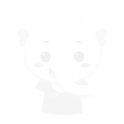
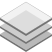

In [32]:
print(review_sourcecode.prettify())  # Check if the HTML contains review elements

In [33]:
product_reviews = review_sourcecode.find_all("p", class_="review-content")  
product_reviews

[]